In [1]:
!git clone https://github.com/tilleyd/cec2017-py.git

Cloning into 'cec2017-py'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 135 (delta 70), reused 105 (delta 45), pack-reused 0
Receiving objects: 100% (135/135), 2.69 MiB | 4.72 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [2]:
import sys
sys.path.insert(1, '/content/cec2017-py')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import cec2017.functions as functions

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

GA Model: 10 Dimension

In [5]:
# Parameters
population_size = 100
num_generations = 200
crossover_rate = 0.8
mutation_rate = 0.1
num_parents_mating = 100

# Elitism rate
elitism_rate = 0.05

# Initialize population
def initialize_population(pop_size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, dim))

# Fitness function
def fitness_function(solution, func):
    solution = np.array(solution).reshape(1, -1)
    return func(solution)[0]

# Selection
def select_mating_pool(population, fitness, num_parents):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_parents]]

# Crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]

    return offspring

# Mutation
def mutation(offspring, bounds, mutation_rate):
    for idx in range(offspring.shape[0]):
        if np.random.rand() < mutation_rate:
            random_value = np.random.uniform(bounds[0], bounds[1], 1)
            offspring[idx, np.random.randint(0, offspring.shape[1])] = random_value
    return offspring

# Retain the best individuals
def apply_elitism(population, fitness, num_elites):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_elites]]

# Genetic Algorithm
def genetic_algorithm(func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate):
    population = initialize_population(population_size, dim, bounds)
    num_elites = int(elitism_rate * population_size)
    best_fitness_overall = float('inf')
    best_solution_overall = None

    for generation in range(num_generations):
        fitness = np.array([fitness_function(ind, func) for ind in population])

        best_fitness_current = np.min(fitness)
        best_solution_current = population[np.argmin(fitness)]

        if best_fitness_current < best_fitness_overall:
            best_fitness_overall = best_fitness_current
            best_solution_overall = best_solution_current

        # Elitism
        elites = apply_elitism(population, fitness, num_elites)

        parents = select_mating_pool(population, fitness, num_parents_mating)
        offspring_crossover = crossover(parents, (population_size - num_elites, dim))
        offspring_mutation = mutation(offspring_crossover, bounds, mutation_rate)

        population[:num_elites, :] = elites
        population[num_elites:, :] = offspring_mutation

        print(f"Generation {generation + 1}: Best fitness = {best_fitness_current}")

    return best_solution_overall, best_fitness_overall




In [6]:
# CEC 2017 functions

dim = 10
bounds = [-100, 100]


results = []

for function_id in range(1, 11):
    print(f"\nGA on CEC 2017 Function {function_id}")
    cec_func = getattr(functions, f'f{function_id}')

    best_solution, best_fitness = genetic_algorithm(cec_func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate)

    print(f"Function {function_id}: Best solution found: {best_solution}")
    print(f"Function {function_id}: Best solution fitness: {best_fitness}")


    results.append({
        "Function ID": function_id,
        "Best Fitness": best_fitness
    })

results_df = pd.DataFrame(results)

print("\nFinal Results:")
print(results_df)



GA on CEC 2017 Function 1
Generation 1: Best fitness = 76398238062.30447
Generation 2: Best fitness = 76398238062.30447
Generation 3: Best fitness = 76398238062.30447
Generation 4: Best fitness = 76398238062.30447
Generation 5: Best fitness = 71070621694.78424
Generation 6: Best fitness = 53851926053.843796
Generation 7: Best fitness = 53851926053.843796
Generation 8: Best fitness = 53851926053.843796
Generation 9: Best fitness = 53851926053.843796
Generation 10: Best fitness = 53851926053.843796
Generation 11: Best fitness = 53851926053.843796
Generation 12: Best fitness = 53851926053.843796
Generation 13: Best fitness = 53851926053.843796
Generation 14: Best fitness = 53851926053.843796
Generation 15: Best fitness = 47456004408.11993
Generation 16: Best fitness = 47456004408.11993
Generation 17: Best fitness = 43174225593.26573
Generation 18: Best fitness = 27124404770.8167
Generation 19: Best fitness = 27124404770.8167
Generation 20: Best fitness = 27124404770.8167
Generation 21: B

GA Model: 30 dimensions

In [7]:

dim = 30  # 30 dimensions
bounds = [-100, 100]

results = []

for function_id in range(1, 11):
    print(f"\nRunning GA on CEC 2017 Function {function_id}")
    cec_func = getattr(functions, f'f{function_id}')

    best_solution, best_fitness = genetic_algorithm(cec_func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate)

    print(f"Function {function_id}: Best solution found: {best_solution}")
    print(f"Function {function_id}: Best solution fitness: {best_fitness}")


    results.append({
        "Function ID": function_id,
        "Best Fitness": best_fitness
    })

results_df = pd.DataFrame(results)

print("\nFinal Results:")
print(results_df)



Running GA on CEC 2017 Function 1
Generation 1: Best fitness = 1422473292973.6704
Generation 2: Best fitness = 1220315796533.8997
Generation 3: Best fitness = 1121810347773.7068
Generation 4: Best fitness = 867793306026.8397
Generation 5: Best fitness = 867793306026.8397
Generation 6: Best fitness = 819957111155.0178
Generation 7: Best fitness = 819957111155.0178
Generation 8: Best fitness = 819957111155.0178
Generation 9: Best fitness = 813406456642.654
Generation 10: Best fitness = 792788370430.6594
Generation 11: Best fitness = 792788370430.6594
Generation 12: Best fitness = 685977453155.2816
Generation 13: Best fitness = 685977453155.2816
Generation 14: Best fitness = 685977453155.2816
Generation 15: Best fitness = 685977453155.2816
Generation 16: Best fitness = 682373148894.7776
Generation 17: Best fitness = 682373148894.7776
Generation 18: Best fitness = 682373148894.7776
Generation 19: Best fitness = 674225962951.8477
Generation 20: Best fitness = 674225962951.8477
Generation 2

In [10]:
# Parameters
population_size = 100
num_generations = 200
crossover_rate = 0.8
mutation_rate = 0.1
num_parents_mating = 100
elitism_rate = 0.05

def initialize_population(pop_size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, dim))

def fitness_function(solution, func):
    solution = np.array(solution).reshape(1, -1)
    return func(solution)[0]

def select_mating_pool(population, fitness, num_parents):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_parents]]

def crossover(parents, offspring_size, crossover_rate):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)

    for k in range(offspring_size[0]):
        if np.random.rand() < crossover_rate:
            parent1_idx = k % parents.shape[0]
            parent2_idx = (k + 1) % parents.shape[0]
            offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        else:
            offspring[k, :] = parents[k % parents.shape[0], :]

    return offspring

def mutation(offspring, bounds, mutation_rate):
    for idx in range(offspring.shape[0]):
        if np.random.rand() < mutation_rate:
            random_value = np.random.uniform(bounds[0], bounds[1], 1)
            offspring[idx, np.random.randint(0, offspring.shape[1])] = random_value
    return offspring

def apply_elitism(population, fitness, num_elites):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_elites]]

# Surrogate model using Linear Regression
def train_surrogate_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

def evaluate_with_surrogate(model, individual):
    return model.predict([individual])[0]

# Genetic Algorithm with Surrogate
def genetic_algorithm_with_surrogate(func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate, surrogate_generation_threshold=10):
    population = initialize_population(population_size, dim, bounds)
    num_elites = int(elitism_rate * population_size)
    best_fitness_overall = float('inf')
    best_solution_overall = None
    surrogate_model = None
    best_fitness_per_generation = []

    for generation in range(num_generations):
        if generation > surrogate_generation_threshold and surrogate_model is not None:
            fitness = np.array([evaluate_with_surrogate(surrogate_model, ind) for ind in population])
        else:
            fitness = np.array([fitness_function(ind, func) for ind in population])

            if generation == surrogate_generation_threshold:
                surrogate_model = train_surrogate_model(population, fitness)

        best_fitness_current = np.min(fitness)
        best_solution_current = population[np.argmin(fitness)]

        if best_fitness_current < best_fitness_overall:
            best_fitness_overall = best_fitness_current
            best_solution_overall = best_solution_current

        best_fitness_per_generation.append(best_fitness_current)

        elites = apply_elitism(population, fitness, num_elites)

        parents = select_mating_pool(population, fitness, num_parents_mating)
        offspring_crossover = crossover(parents, (population_size - num_elites, dim), crossover_rate)
        offspring_mutation = mutation(offspring_crossover, bounds, mutation_rate)

        population[:num_elites, :] = elites
        population[num_elites:, :] = offspring_mutation

        print(f"Generation {generation + 1}: Best fitness = {best_fitness_current}")

    return best_solution_overall, best_fitness_overall, best_fitness_per_generation



Running GA on CEC 2017 Function 5
Generation 1: Best fitness = 653.666642339713
Generation 2: Best fitness = 608.3684298245653
Generation 3: Best fitness = 608.3684298245653
Generation 4: Best fitness = 608.3684298245653
Generation 5: Best fitness = 608.3684298245653
Generation 6: Best fitness = 608.3684298245653
Generation 7: Best fitness = 608.3684298245653
Generation 8: Best fitness = 601.566784636205
Generation 9: Best fitness = 597.0186467364626
Generation 10: Best fitness = 597.0186467364626
Generation 11: Best fitness = 597.0186467364626
Generation 12: Best fitness = 588.2230235157487
Generation 13: Best fitness = 579.5262928921958
Generation 14: Best fitness = 579.5262928921958
Generation 15: Best fitness = 579.5262928921958
Generation 16: Best fitness = 579.5262928921958
Generation 17: Best fitness = 578.6782483600846
Generation 18: Best fitness = 563.9076488833554
Generation 19: Best fitness = 563.9076488833554
Generation 20: Best fitness = 558.8037163816175
Generation 21: B

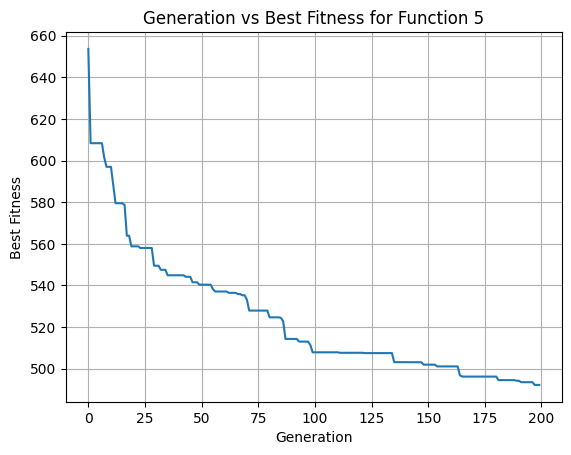

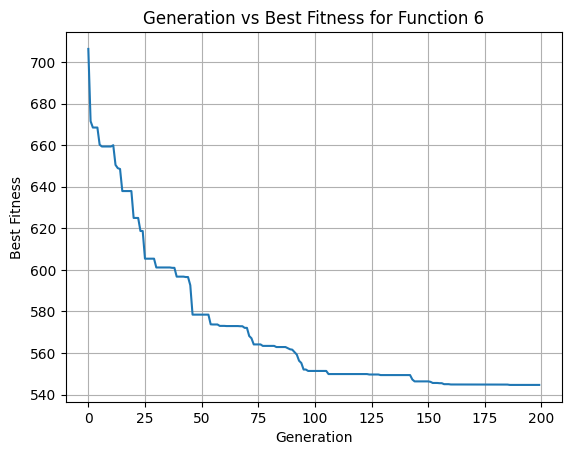

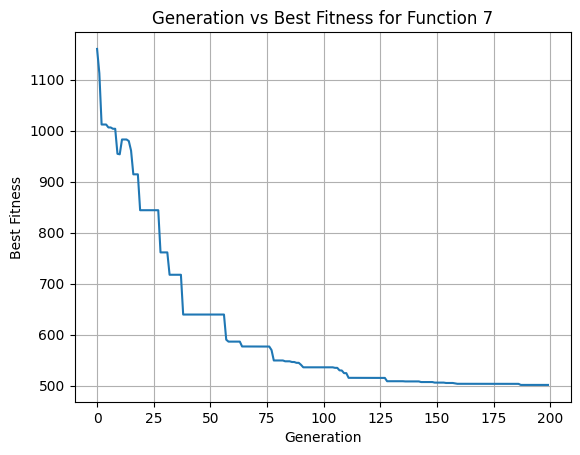

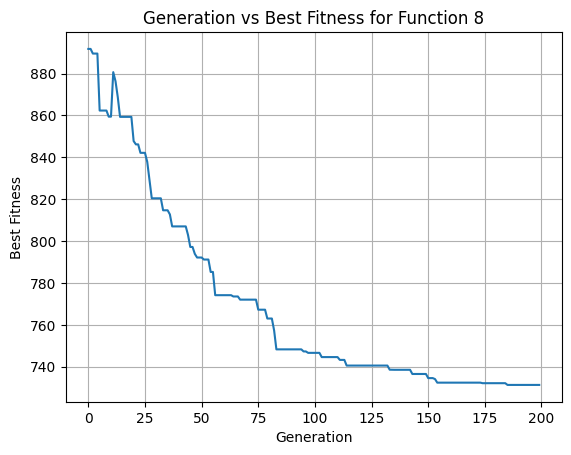

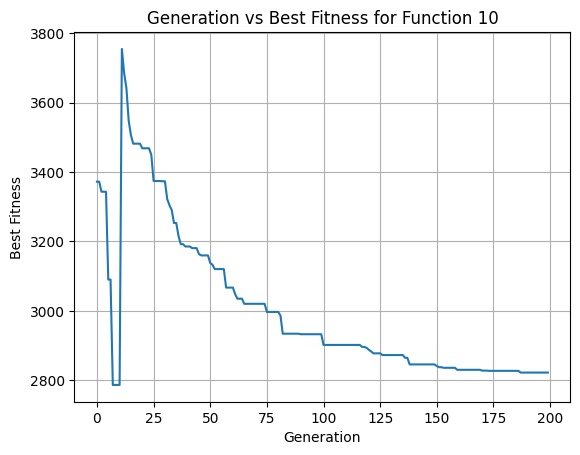

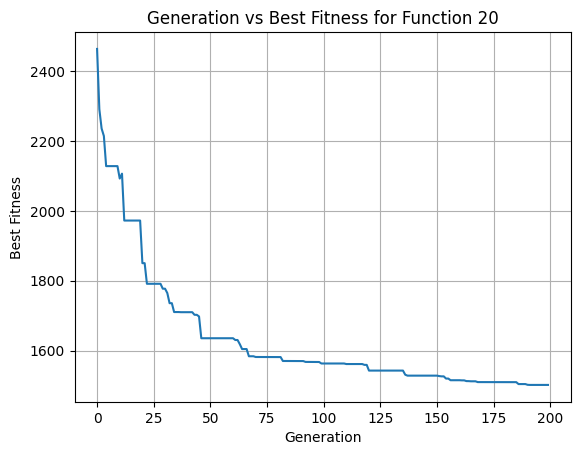

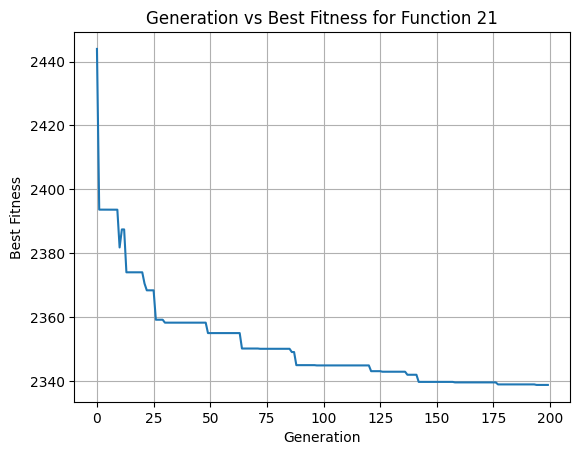

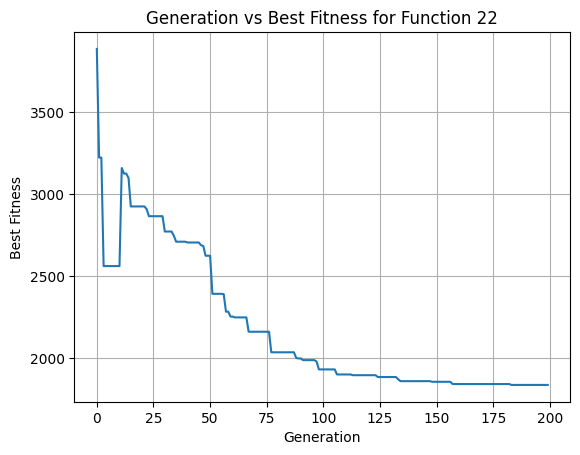

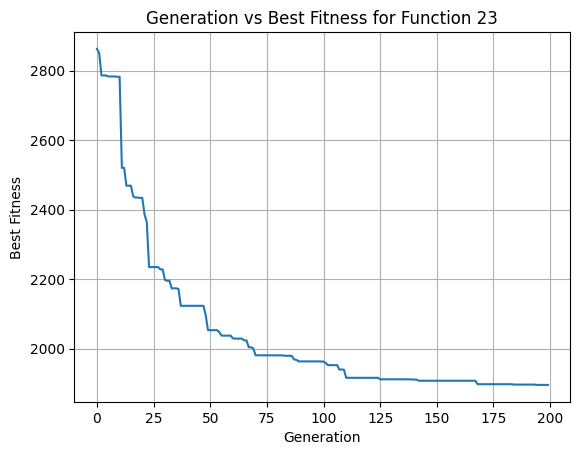

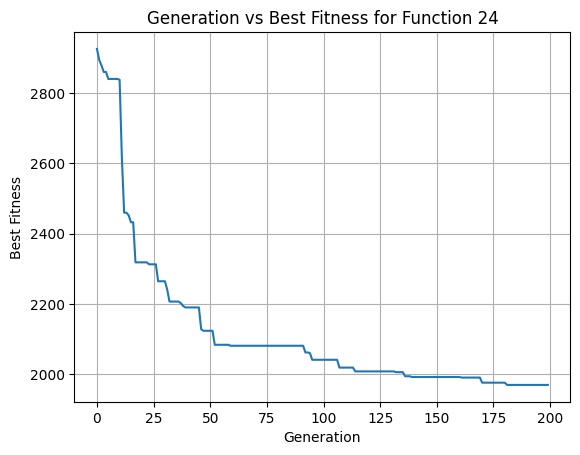

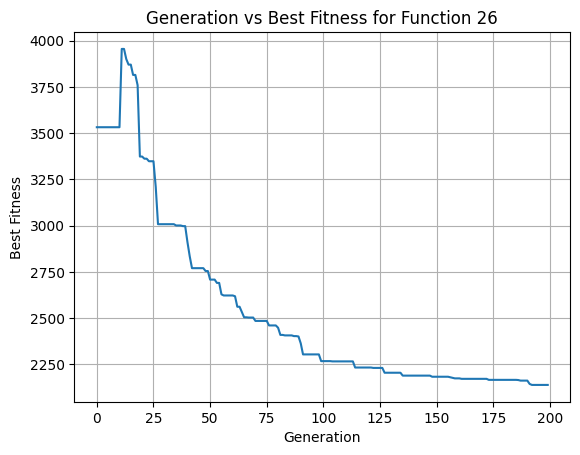

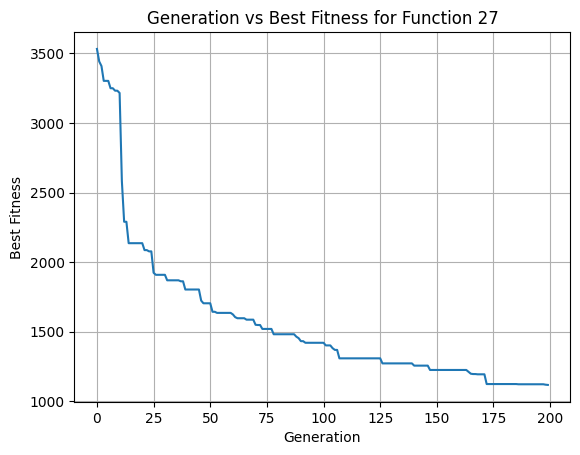

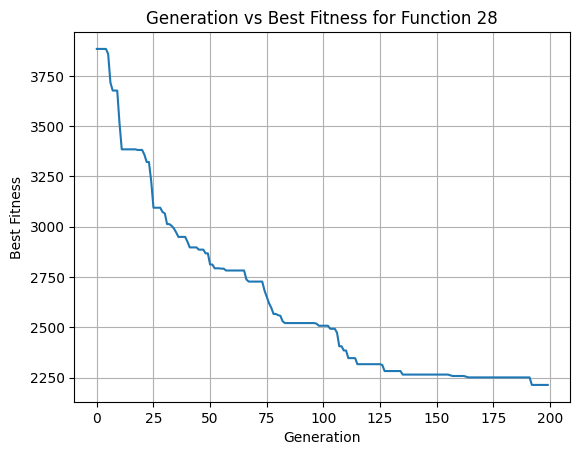

In [11]:
dim = 10
bounds = [-100, 100]
results = []
fitness_over_generations = {}

for function_id in [5, 6, 7, 8, 10, 20, 21, 22, 23, 24, 26, 27, 28]:
    print(f"\nRunning GA on CEC 2017 Function {function_id}")
    cec_func = getattr(functions, f'f{function_id}')

    best_solution, best_fitness, fitness_per_generation = genetic_algorithm_with_surrogate(
        cec_func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate)

    print(f"Function {function_id}: Best solution found: {best_solution}")
    print(f"Function {function_id}: Best solution fitness: {best_fitness}")

    results.append({
        "Function ID": function_id,
        "Best Fitness": best_fitness
    })

    fitness_over_generations[function_id] = fitness_per_generation

results_df = pd.DataFrame(results)
print("\nFinal Results:")
print(results_df)



# Plotting the results
for function_id in fitness_over_generations.keys():
    plt.figure()
    plt.plot(fitness_over_generations[function_id])
    plt.title(f'Generation vs Best Fitness for Function {function_id}')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()

New Model

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

population_size = 100
num_generations = 200
crossover_rate = 0.8
mutation_rate = 0.1
num_parents_mating = 100
elitism_rate = 0.05

def initialize_population(pop_size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (pop_size, dim))

def fitness_function(solution, func):
    solution = np.array(solution).reshape(1, -1)
    return func(solution)[0]

def select_mating_pool(population, fitness, num_parents):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_parents]]

def apply_elitism(population, fitness, num_elites):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_elites]]

def adaptive_rates(generation, max_generations, initial_rate):
    return initial_rate * (1 - (generation / max_generations))

def mutation(offspring, bounds, mutation_rate):
    for idx in range(offspring.shape[0]):
        if np.random.rand() < mutation_rate:
            random_value = np.random.uniform(bounds[0], bounds[1], 1)
            offspring[idx, np.random.randint(0, offspring.shape[1])] = random_value
    return offspring

def crossover(parents, offspring_size, crossover_rate):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)

    for k in range(offspring_size[0]):
        if np.random.rand() < crossover_rate:
            parent1_idx = k % parents.shape[0]
            parent2_idx = (k + 1) % parents.shape[0]
            offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        else:
            offspring[k, :] = parents[k % parents.shape[0], :]

    return offspring

def genetic_algorithm(func, bounds, dim, num_generations, population_size, initial_crossover_rate, initial_mutation_rate, elitism_rate):
    population = initialize_population(population_size, dim, bounds)
    num_elites = int(elitism_rate * population_size)
    best_fitness_overall = float('inf')
    best_solution_overall = None
    best_fitness_per_generation = []

    for generation in range(num_generations):
        crossover_rate = adaptive_rates(generation, num_generations, initial_crossover_rate)
        mutation_rate = adaptive_rates(generation, num_generations, initial_mutation_rate)

        fitness = np.array([fitness_function(ind, func) for ind in population])

        best_fitness_current = np.min(fitness)
        best_solution_current = population[np.argmin(fitness)]

        if best_fitness_current < best_fitness_overall:
            best_fitness_overall = best_fitness_current
            best_solution_overall = best_solution_current

        best_fitness_per_generation.append(best_fitness_current)

        elites = apply_elitism(population, fitness, num_elites)

        parents = select_mating_pool(population, fitness, num_parents_mating)
        offspring_crossover = crossover(parents, (population_size - num_elites, dim), crossover_rate)
        offspring_mutation = mutation(offspring_crossover, bounds, mutation_rate)

        population[:num_elites, :] = elites
        population[num_elites:, :] = offspring_mutation

        print(f"Generation {generation + 1}: Best fitness = {best_fitness_current}, Crossover Rate = {crossover_rate:.4f}, Mutation Rate = {mutation_rate:.4f}")

    return best_solution_overall, best_fitness_overall, best_fitness_per_generation




Running GA on CEC 2017 Function 5
Generation 1: Best fitness = 591.984621224603, Crossover Rate = 0.8000, Mutation Rate = 0.1000
Generation 2: Best fitness = 591.984621224603, Crossover Rate = 0.7960, Mutation Rate = 0.0995
Generation 3: Best fitness = 591.984621224603, Crossover Rate = 0.7920, Mutation Rate = 0.0990
Generation 4: Best fitness = 591.984621224603, Crossover Rate = 0.7880, Mutation Rate = 0.0985
Generation 5: Best fitness = 591.984621224603, Crossover Rate = 0.7840, Mutation Rate = 0.0980
Generation 6: Best fitness = 591.984621224603, Crossover Rate = 0.7800, Mutation Rate = 0.0975
Generation 7: Best fitness = 591.984621224603, Crossover Rate = 0.7760, Mutation Rate = 0.0970
Generation 8: Best fitness = 591.984621224603, Crossover Rate = 0.7720, Mutation Rate = 0.0965
Generation 9: Best fitness = 591.984621224603, Crossover Rate = 0.7680, Mutation Rate = 0.0960
Generation 10: Best fitness = 591.984621224603, Crossover Rate = 0.7640, Mutation Rate = 0.0955
Generation 11:

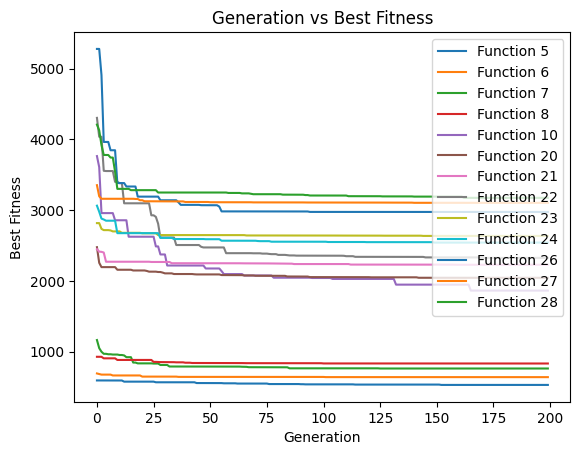

In [14]:
dim = 10
bounds = [-100, 100]
results = []
fitness_over_generations = {}

for function_id in [5, 6, 7, 8, 10, 20, 21, 22, 23, 24, 26, 27, 28]:
    print(f"\nRunning GA on CEC 2017 Function {function_id}")
    cec_func = getattr(functions, f'f{function_id}')

    best_solution, best_fitness, fitness_per_generation = genetic_algorithm(cec_func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate)

    print(f"Function {function_id}: Best solution found: {best_solution}")
    print(f"Function {function_id}: Best solution fitness: {best_fitness}")

    results.append({
        "Function ID": function_id,
        "Best Fitness": best_fitness
    })

    fitness_over_generations[function_id] = fitness_per_generation

results_df = pd.DataFrame(results)

print("\nFinal Results:")
print(results_df)

# Plotting the results
for function_id in fitness_over_generations.keys():
    plt.plot(fitness_over_generations[function_id], label=f'Function {function_id}')

plt.title('Generation vs Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.show()



Running GA on CEC 2017 Function 5
Generation 1: Best fitness = 619.2426648788518, Crossover Rate = 0.8000, Mutation Rate = 0.1000
Generation 2: Best fitness = 619.2426648788518, Crossover Rate = 0.7960, Mutation Rate = 0.0995
Generation 3: Best fitness = 619.2426648788518, Crossover Rate = 0.7920, Mutation Rate = 0.0990
Generation 4: Best fitness = 611.3549644917961, Crossover Rate = 0.7880, Mutation Rate = 0.0985
Generation 5: Best fitness = 611.3549644917961, Crossover Rate = 0.7840, Mutation Rate = 0.0980
Generation 6: Best fitness = 611.3549644917961, Crossover Rate = 0.7800, Mutation Rate = 0.0975
Generation 7: Best fitness = 611.3549644917961, Crossover Rate = 0.7760, Mutation Rate = 0.0970
Generation 8: Best fitness = 611.3549644917961, Crossover Rate = 0.7720, Mutation Rate = 0.0965
Generation 9: Best fitness = 606.6531409870902, Crossover Rate = 0.7680, Mutation Rate = 0.0960
Generation 10: Best fitness = 606.6531409870902, Crossover Rate = 0.7640, Mutation Rate = 0.0955
Gene

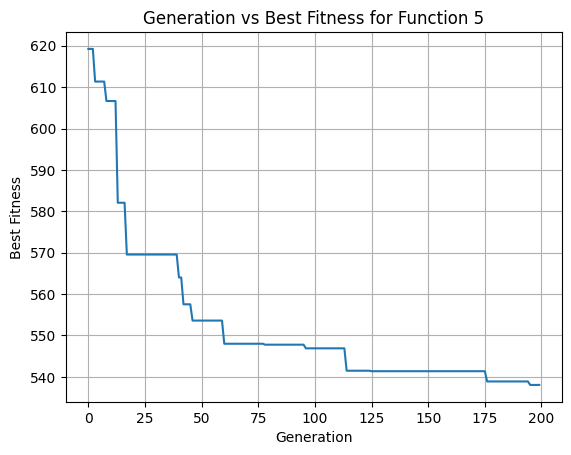

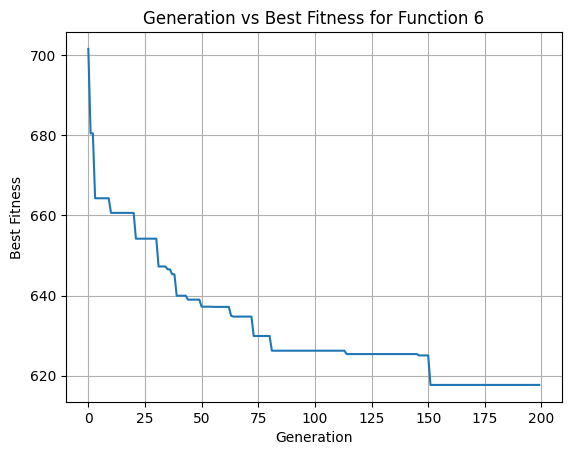

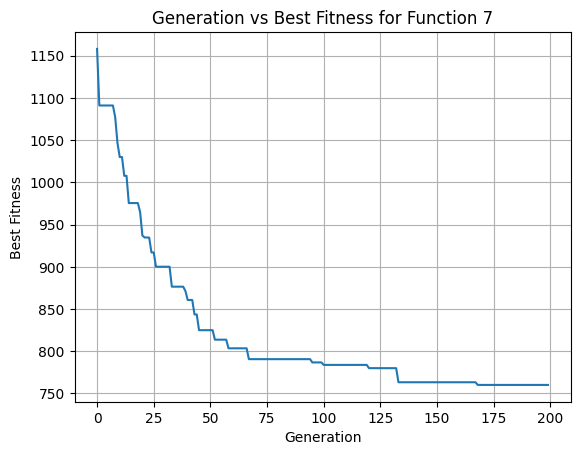

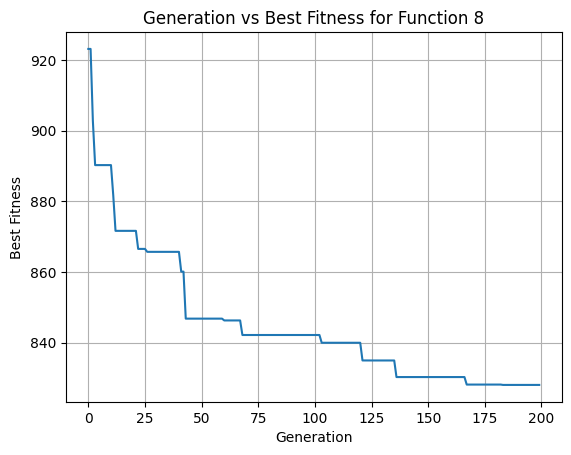

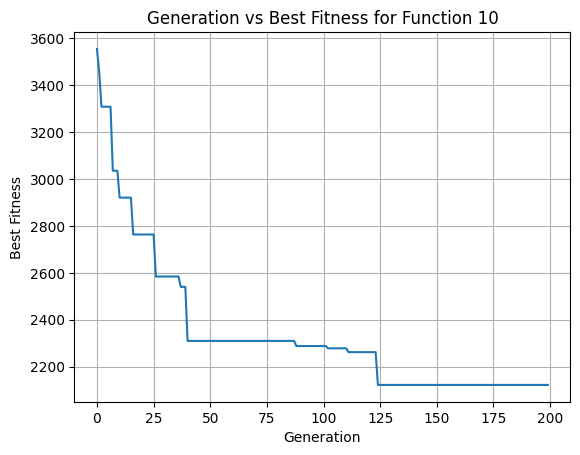

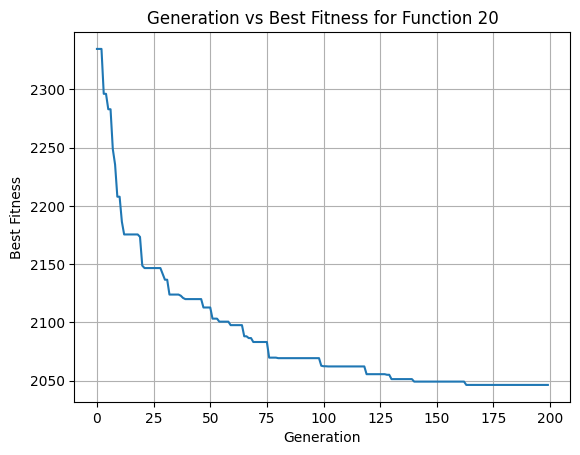

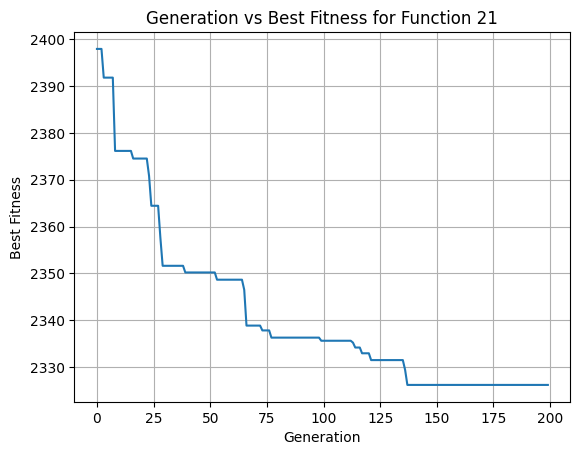

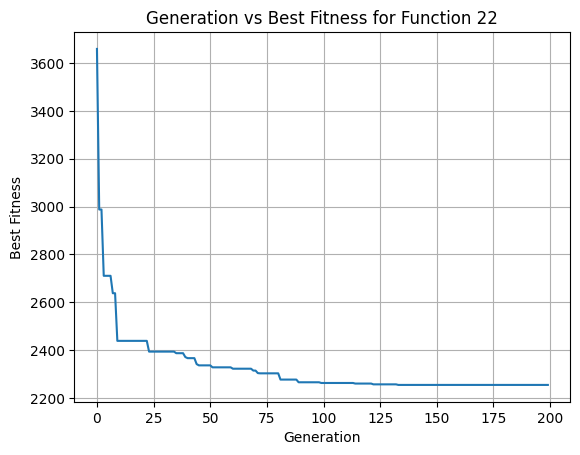

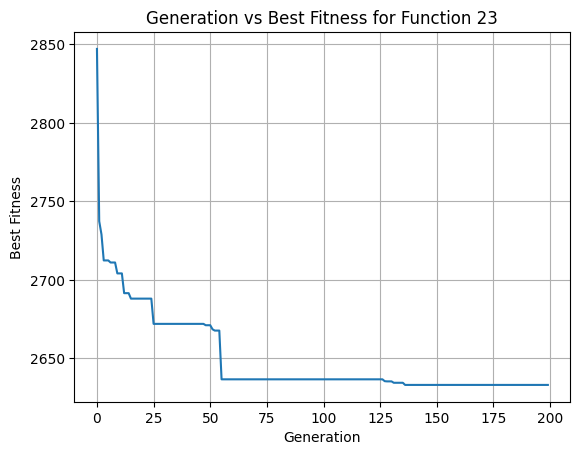

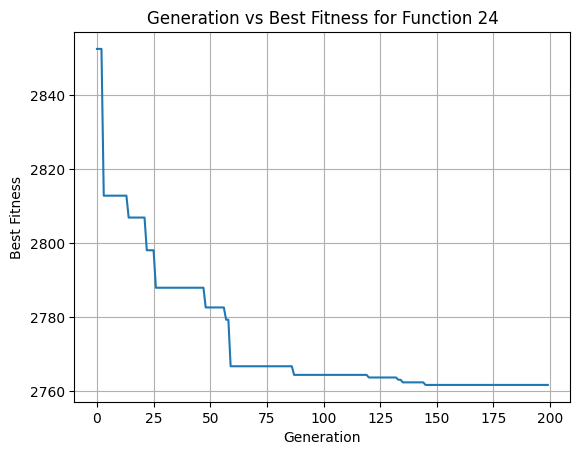

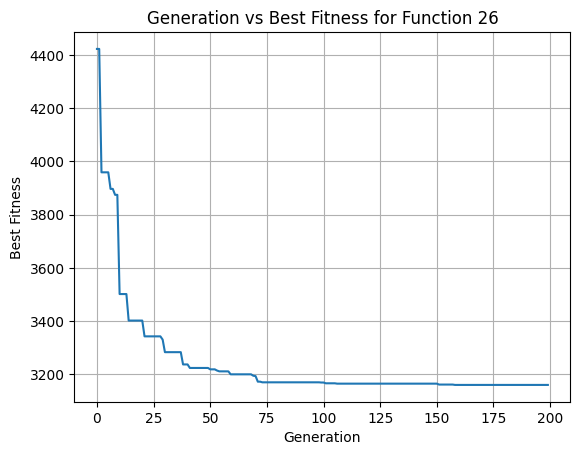

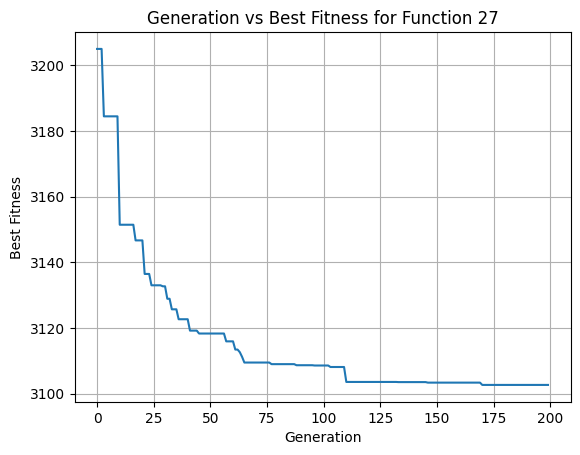

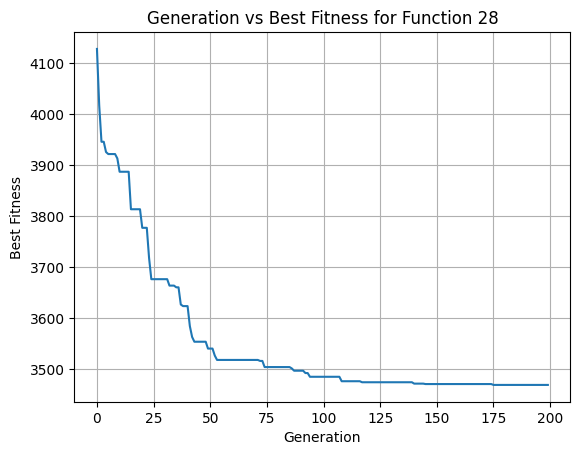

In [15]:
dim = 10
bounds = [-100, 100]
results = []
fitness_over_generations = {}

for function_id in [5, 6, 7, 8, 10, 20, 21, 22, 23, 24, 26, 27, 28]:
    print(f"\nRunning GA on CEC 2017 Function {function_id}")
    cec_func = getattr(functions, f'f{function_id}')

    best_solution, best_fitness, fitness_per_generation = genetic_algorithm(cec_func, bounds, dim, num_generations, population_size, crossover_rate, mutation_rate, elitism_rate)

    print(f"Function {function_id}: Best solution found: {best_solution}")
    print(f"Function {function_id}: Best solution fitness: {best_fitness}")

    results.append({
        "Function ID": function_id,
        "Best Fitness": best_fitness
    })

    fitness_over_generations[function_id] = fitness_per_generation

results_df = pd.DataFrame(results)

print("\nFinal Results:")
print(results_df)

for function_id in fitness_over_generations.keys():
    plt.figure()
    plt.plot(fitness_over_generations[function_id])
    plt.title(f'Generation vs Best Fitness for Function {function_id}')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.show()